### Group Contributions Statement

Sarah, Amaan, Anika...

# Welcome to the Penguins Python Programming Party!

Hi, Reader! You have just joined the penguins python programming party! Today's festivities include a brief exploration of a sample of penguins inhabiting the Antarctic such as their species classification, physical properties, and location, after which we will embark on a machine learning adventure to develop a powerfully predictive model that helps us identify the species of a penguin based on a variety of measurements.

Before we begin, we should evaluate what exactly we are trying to achieve. In terms of exploratory analysis, we want to take a set of data and just start to investigate, parse, and become comfortable with it. We ask questions like, 'what columns are in our dataset', 'how many rows do we have', 'is there any correlation between these two specific variables', 'if there is, what type of correlation is it', etc. We seek to answer these questions with helpful visualizations, both tabular and graphical. As for the actual machine learning, we want to construct models that find patterns in the data and make good predictions based on those patterns. In other words, we take a limited amount of information, analyze it, and create models that transform input data to an appropriate output. More specifically, we are trying to map predictor variables, or the variables that our model uses to predict the output, to the target variable, the thing that we are trying to predict. 

The goal of our machine learning today is to predict the species of a penguin given a small set of measurements. Consequently, the measurements/ variables that our model will use to determine the species of a penguin are the predictor variables and the species of the penguin is the target variable. 

To begin, let's import all the required libraries. This includes pandas to load our dataframe, numpy to support numerical calculation and array manipulation, matplotlib to construct helpful visualizations, and a variety of methods from sklearn to select, prep, and model our data.

In [2]:
# importing all necessary libraries 

# we will be accessing and manipulating the penguin dataset
import pandas as pd
# we will be working with arrays and quantitative measurements
import numpy as np
# we will use preprocessing to transform qualitative variables into quantitative variables
from sklearn import preprocessing
# we will be implementing cross validation
from sklearn.model_selection import cross_val_score
# we will be splitting our available data into training and test sets
from sklearn.model_selection import train_test_split
# we will be generating helpful visual displays 
from matplotlib import pyplot as plt
# we will be developing a support vector classifier in feature selection and potentially, as a model
from sklearn import svm
# we will be developing a logistic regression classifier in feature selection and as a required model
from sklearn.linear_model import LogisticRegression
# we will be developing a decision tree classifier in feature selection and as a required model
from sklearn import tree
# we will be developing a k nearest neighbors classifier in feature selection and potentially, as a model
from sklearn.neighbors import KNeighborsClassifier
# we will be developing a random forest classifier in feature selection and potentially, as a model
from sklearn.ensemble import RandomForestClassifier

# retrieving the penguins data
penguins = pd.read_csv("palmer_penguins.csv")

## Exploratory Analysis

Great! We have imported all the required libraries. We are now ready to delve into the exploratory analysis, or the component of machine learning where we familiarize ourselves (i.e. essentially 'learn') with the penguins dataset and try to see if we can identify some patterns and correlations in the data.

Let's begin by loading our dataframe and taking a look at the columns and number of rows.

In [54]:
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


Okay, so we have already acquired a great deal of information. We know that there are 344 rows total and each row specifies an individual penguin, leaving us with 344 total penguins. We can also see that there are a total of 17 columns, a few of which display qualitative variables (i.e. 'Species', 'Region', 'Island', 'Sex', 'Clutch Completion', etc.) and a few with quantitative variables (i.e. 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 C (o/oo)', etc.).

To further dive into our data, let's produce a few tables describing the summary statistics for particular elements in the dataset. We can gather quite a bit of insight into the quantitative data by computing just a simple mean and standard deviation. We can gain insight into the qualitative data by grouping/ splitting by these qualitative variable like 'Sex', 'Island', and 'Species.'

Let's define a function 'penguin_summary_table' to perform this table-generating behavior.

In [2]:
# defined a function 'penguin_summary_table' that generates a table of summary statistics
def penguin_summary_table(group_cols, value_cols):
    """
    Parameters:
    -----------
    group_cols: a list of user-specified columns that will act as grouping variables
    value_cols: a list of user-specified columns for which summary statistics will be calculated
    
    Returns:
    -----------
    a table with computed summary statistics (mean and standard deviation) for the each element specified
    by 'value_cols' grouped according 'group_cols'
    """
    # grouping penguins by group_cols and calculating the mean and std for each element of value-cols 
    summary = penguins.groupby(group_cols)[value_cols].aggregate(['mean', 'std'])
    
    # rounding each computed value to 2 decimal places
    summary = summary.round(2)
    
    # returning the summary table
    return summary

In [3]:
penguin_summary_table(["Species"], ["Culmen Length (mm)", "Culmen Depth (mm)"])

Culmen Length (mm)        \
                                                        mean   std   
Species                                                              
Adelie Penguin (Pygoscelis adeliae)                    38.79  2.66   
Chinstrap penguin (Pygoscelis antarctica)              48.83  3.34   
Gentoo penguin (Pygoscelis papua)                      47.50  3.08   

                                          Culmen Depth (mm)        
                                                       mean   std  
Species                                                            
Adelie Penguin (Pygoscelis adeliae)                   18.35  1.22  
Chinstrap penguin (Pygoscelis antarctica)             18.42  1.14  
Gentoo penguin (Pygoscelis papua)                     14.98  0.98

In this first table, we see that culmen length differs significantly between Adelie penguins and Chinstrap/ Gentoo, but not between Chinstrap and Gentoo. Consequently, culmen length may play a useful tool in determining whether a penguin is Adelie. On the other hand, for culmen depth, it appears that Gentoo penguins have a smaller culmen depth than both Adelie and Chinstrap penguins, which have similar culmen depths. As such, culmen depth may prove handy in identifying whether a penguin is Gentoo. Taken together, we can speculate that culmen length and culmen depth alone are sufficient to predict the species of a penguin. But, let's not jump to any conclusions to soon.

In [58]:
penguin_summary_table(["Species"], ["Body Mass (g)", "Flipper Length (mm)"])

Body Mass (g)          \
                                                   mean     std   
Species                                                           
Adelie Penguin (Pygoscelis adeliae)             3700.66  458.57   
Chinstrap penguin (Pygoscelis antarctica)       3733.09  384.34   
Gentoo penguin (Pygoscelis papua)               5076.02  504.12   

                                          Flipper Length (mm)        
                                                         mean   std  
Species                                                              
Adelie Penguin (Pygoscelis adeliae)                    189.95  6.54  
Chinstrap penguin (Pygoscelis antarctica)              195.82  7.13  
Gentoo penguin (Pygoscelis papua)                      217.19  6.48

In this second table, we first observe that Gentoo penguins weigh the most on average at around 5000 grams, followed by Chinstrap and Adelie penguins, which both weigh approximately 3700 grams. In all three cases, however, body mass seems to fluctuate considerably as each standard deviation is above 440 grams. We speculate that these large variations are attributed to differences between the sexes. Consequently, we can guess that body mass alone might not be the best predictor variable; however, it may have the potential to be useful in conjuction with sex. As for flipper length, Gentoo penguins appear to have the longest flippers followed by Chinstrap penguins and then Adelie penguins. Flipper length and body mass together would not be good predictor variables since Chinstrap and Adelie penguins have similar masses and similar flipper lengths.

From these two tables, we can reasonably gather that culmen length and culmen depth will work better as predictor variables than body mass and flipper length. To get a better understanding of the relationship between culmen length and depth and between these two quanititative variables and the qualitative variables of 'Island' and 'Sex', let's generate some visualizations. To do this, let's define a function 'plotting penguins' that creates a number of scatter plots with culmen length on the x-axis and culmen depth on the y-axis.

In [13]:
def plotting_penguins(qual_var = "None"):
    """
    Parameters:
    -----------
    qual_var: a user-specified string describing a qualitative variable that will be
    used to split and group the data in the figure; if set to "None", no grouping
    variable save for 'Species' is applied
    
    Returns:
    -----------
    constructs a single scatter plot with Culmen Length on the x-axis and Culmen Depth on the
    y-axis; the data points are automatically split by species and a user-specified
    qualitative variable (if defined)
    
    """
    # produced a figure with one axis and a figsize of (10, 10)
    fig, ax = plt.subplots(1, figsize = (10, 10))
    
    # set the appropriate axis labels: Culmen Length (mm) on the x, Culmen Depth (mm) on the y
    ax.set(xlabel = "Culmen Length (mm)", ylabel = "Culmen Depth (mm)")
    
    # read in the dataframe
    penguins = pd.read_csv("palmer_penguins.csv")
    
    # removed the one anomaly (Gentoo penguin with sex '.')
    penguins = penguins[penguins['Sex'] != '.']
    
    # initialized 'ps' as a list of all unique species (i.e. Adelie, Gentoo, Chinstrap)
    ps = list(set(penguins['Species']))
    
    # used a for-loop to iterate over each unique species
    for species in range(len(ps)):
        
        # found each of the data points in the penguins dataframe that corresponds to that species
        spec = penguins[penguins['Species'] == ps[species]]
        
        # if a qualitative grouping variable has been specified by the user (i.e. default 'None' has been 
        # overwritten)
        if qual_var != 'None':
            
            # initialized 'var' with the unique values of the qualitative variable
            var = list(set(penguins[qual_var].dropna()))
            
            # a nested for-loop that iterates over each unique value of the qualitative variable
            for i in range(len(var)):
                
                # found each of the data points in the previously defined spec subframes that 
                # corresponds to a unique value of qual_var
                spec2 = spec[spec[qual_var] == var[i]]
                
                # generated the scatter plot with appropriate labels and transparency
                ax.scatter(spec2["Culmen Length (mm)"], spec2['Culmen Depth (mm)'], 
                           label = ps[species].split()[0] + ", " + var[i].split()[0],
                           alpha = 0.8)
        # if the default 'None' has not been overwritten
        else:
            
            # generated a scatter plot with culmen length and depth just grouped by species
            # added the appropriate labels
            ax.scatter(spec["Culmen Length (mm)"], spec["Culmen Depth (mm)"], 
                       label = ps[species].split()[0], alpha = 0.3)
    
    # printed each figure with a key
    ax.legend()        

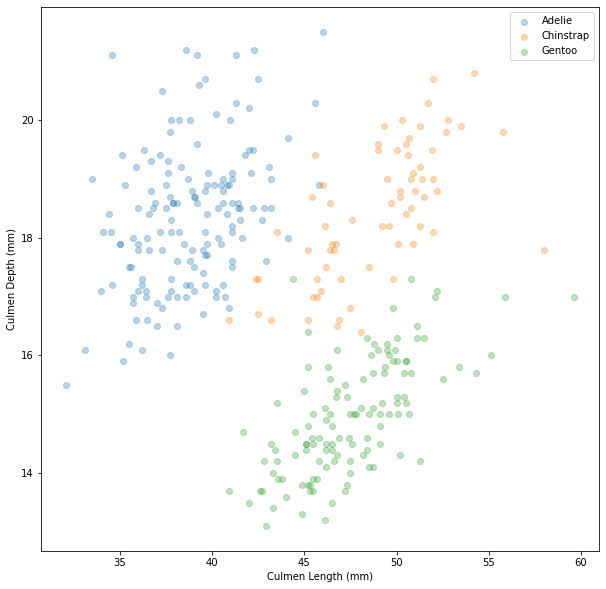

In [14]:
plotting_penguins()

In this figure, we first notice a somewhat negative correlation between culmen length and culmen depth. In other words, we see that as culmen length increases, culmen length decreases on average. However, within each species, there appears to be a positive correlation between culmen length and culmen depth. Also, we see three relatively distinct 'blobs' separating each species, a further indicator that culmen length paired with culmen depth may be a good combination for predictor variables. 

More specifically, we observe that Adelie penguins have the shortest culmen lengths, centered around 37 mm, and the largest culmen depths (albeit by an extremely small margin). Chinstrap penguins appear to have longer culmen lengths, centered around 47 mm, and similar culmen depths to Adelie penguins. Gentoo penguins seem to have the longest culmen lengths, centered around 50 mm, and the shortest culmen depths.

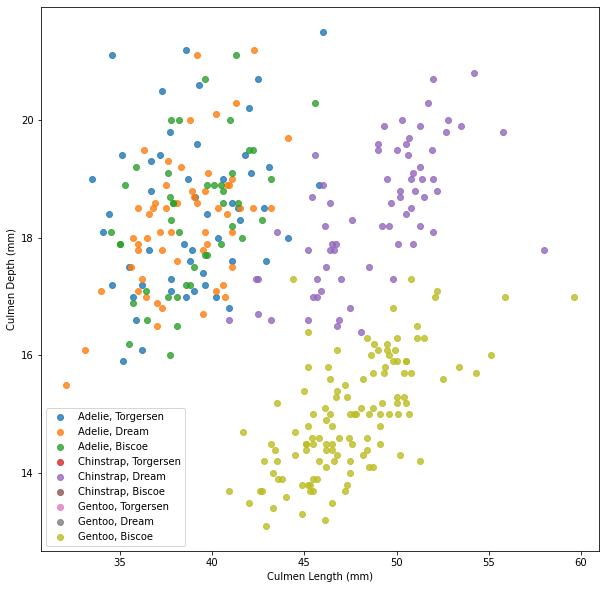

In [16]:
plotting_penguins('Island')

This second figure is just an extentension of the first. The same patterns are preserved with a somewhat negative correlation overall and a positive correlation within each species. Nevertheless, this figure proffers rather crucial information, namely that Chinstrap and Gentoo penguins are localized to one island each, Dream and Biscoe respectively, as there are no data points for (Chinstrap, Biscoe), (Chinstrap, Torgersen), (Gentoo, Dream), or (Gentoo, Torgersen). On the other hand, Adelie penguins, like the popular and social creatures they are, are present on each island. Island, consequently, might be an excellent predictor variable to use in order to differentiate between Chinstrap and Gentoo penguins. Additionally, since Adelie penguins appear to have much shorter culmen lengths than Chinstrap and Gentoo penguins, culmen length can be used to distinguish Adelie from Chinstrap and Gentoo. Taken together, island and culmen length may prove to be the best combination of predictor variables!

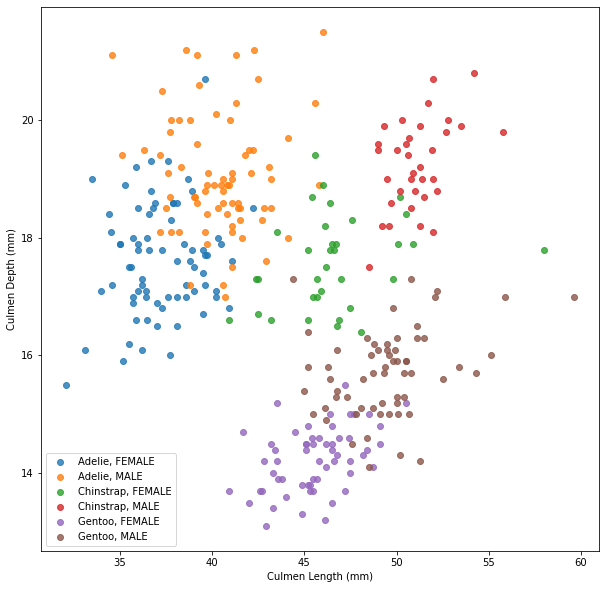

In [15]:
plotting_penguins("Sex")

As in the previous figures, the same overall trends are preserved. However, in this plot we see that female penguins, regardless of species, have shorter culmen lengths and culmen depths than their male counterparts. There also appears to be a clear distinction (i.e. no overlap) between the three species of female penguins (Adelie in the left middle, Chinstrap in the middle, and Gentoo in the bottom middle). Similarly, there does not seem to be any overlap between the three species of male penguins (Adelie localized to top left, Chinstrap to top right, and Gentoo to right bottom/middle). Because of the disparities between the sexes and within the three species for each sex, we can speculate that 'Sex' might also work very well as a predictor variable.  

And with that, we have completed our exploratory analysis. While this have offered some valuable information as to the columns we may wish to use in our modeling, there is a more systematic method by which to select the most optimal columns. This is known as feature selection and we will delve into this topic in the following section.

## Feature Selection

Oftentimes, it is not the case that including more columns, or more 'features', gives way for the most powerful model. Instead, it almost always leads to overfitting, a phenomenon where a model fits random variations in a dataset as opposed to the true signal, and as a result the model performs rather poorly on unseen data. Feature selection is a process in which we select the most optimal columns curated in such a way to meet our specific modeling purposes. In other words, feature selection helps us choose the predictor variables that are most suited to our project demands and that will generate the highest model accuracy or cross validation scores on unseen data ('Model #1: Decision Trees' for a discussion of cross-validation).

Because it makes organizational sense to give a detailed description of the technicalities of machine learning when we actually come to building our models, the following steps that involve specific machine learning mechanisms/ functions (i.e. train-test-split, k-fold cross validation, various classifers) will be discussed in the following section on Decision Trees.

For now, all that is important to know is that we will be deploying feature selection to determine the predictor variables we ought to use in our three machine learning models.

In [9]:
# read in the dataframe
penguins = pd.read_csv("palmer_penguins.csv")

In [10]:
penguins = penguins[['Species', "Island", 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']]

In [11]:
# dropping any NaN values
penguins = penguins.dropna()

In [12]:
# splitting the data into training and test sets
train, test = train_test_split(penguins, test_size = 0.2)

As advanced as they are, machine learning models do not understand text and as such, we have to perform some data manipulation before we actually begin our feature selection. This step is also necessary for creating and training our models later on. So what do we actually have to do? Well, in our penguins dataset, we have three qualitative variables, island, sex, and species. Our goal is to transform these qualitative variables into quantitative variables. This is incredibly simple thanks to a preprocessing tool from sklearn that re-encodes the island, sex, and species of each penguin as a number (i.e. 0 for Biscoe, 1 for Dream, 2 for Torgersen, 0 for female and 1 for male, and 0 for Adelie, 1 for Chinstrap, and 2 for Gentoo respectively).

To further prepare our data for modeling, we need to split our penguins dataframe into predictor and target variables. We do this by initializing a variable 'X', a dataframe that has each predictor variable, and a data series 'y', that stores the target variable species.

We perform all this data preparation and cleaning in one neat and concise function defined below.

In [6]:
# defined a function 'prep_penguin_data()' that prepares (cleans and transforms) a 
# user-specified data frame for future manipulating and processing
def prep_penguins_data(data_df):
    """
    Parameters
    ----------
    data_df: a user-specified dataframe that requires preparation (cleaning and transformation)
    in order that future data analysis may be facilitated
    
    Returns
    ----------
    X: a dataframe that includes predictor variables
            **qualitative predictor variables are transformed into quantitative variables via
            preprocessing 
    y: a data series that includes the target variable
    
    """
    # we cannot directly modify a dataframe, so we have to make a copy using the 'copy()' function
    df = data_df.copy()

    # utilized a label encoder to transform the qualitative 'Sex' variable into a quantitative variable
    # with 1s representing females and 2s representing males 
    
    for columns in df.columns:
        if columns == 'Sex':
            le = preprocessing.LabelEncoder()
            df['Sex'] = le.fit_transform(df["Sex"])
    
        elif columns == 'Island':
            le2 = preprocessing.LabelEncoder()
            df['Island'] = le2.fit_transform(df['Island'])
    
    # because X must include only predictor variables, we have to drop the Species column
    X = df.drop(['Species'], axis = 1)
    # accordingly, y is our target variable and must only include the Species column
    le3 = preprocessing.LabelEncoder()
    df['Species'] = le3.fit_transform(df['Species'])
    y = df['Species']
    
    # we return our cleaned and transformed target and predictor variables
    return (X, y)

In [14]:
X_train, y_train = prep_penguins_data(train)
X_test, y_test = prep_penguins_data(test)

Awesome! We have prepped our data! Now, it's time to perform feature selection. Although it would work well to use three variables as predictors, we want to try to test the limits because we are all pushing-boundaries python programmers here and use only two predictors. So, the first thing that we should do is to generate all the possible combinations of two predictor columns. Following this, we should calculate a model's predictive accuracy on each of these combinations and print out the combination that generates the best score. This is the basic premise of the two functions defined below, 'check_score' which computes each model's accuracy amd 'best_combo' which finds the best combination of two columns.

In addition to decision trees and multinomial regression, we need to develop one more model. Because of this fact, we are going to implement a few different models, including support vector classifiers, random forests, and K-nearest neighbors, and see which model gives us the highest accuracy scores. We will subsequently use that classifier for our third model. As such in both of the following functions, we test all 5 models and find the corresponding 5 combinations that produce the highest scores.

In [15]:
def check_score(model, cols):
    """
    Parameters:
    -----------
    model = a user specified string that defines the model/ classifier to be created
    cols = a user-specified list of columns (predictor variables) on which the model will be trained
    
    Returns:
    -----------
    computes cross validation scores for a classifier trained on columns of the training data 
    (i.e. predictor variables) and returns the average
    
    """
    # a set of conditionals that create different models as per user specifications including logistic 
    # regression, support vector classifiers, decision trees, K-nearest neighbors, and random forests
    if model == 'LR':
        model = LogisticRegression(max_iter = 1000)
    elif model == 'SVC':
        model = svm.SVC()
    elif model == 'T':
        model = tree.DecisionTreeClassifier()
    elif model == 'knn':
        model = KNeighborsClassifier()
    else:
        model = RandomForestClassifier()
    
    # calculated cross-validation scores for the model by deploying the 'cross_val_score' method of sklearn on
    # the training data with a k-fold value of 5
    # took the mean of the numpy array generated by 'cross_val_score' to acquire an average CV score
    return cross_val_score(model, X_train[cols], y_train, cv = 5).mean()

In [25]:
import itertools

def best_combo(models, n):
    """
    Parameters:
    -----------
    models: a list of strings defining the models to be created
    n: an integer specifying the number of predictor variables 
    
    Returns:
    -----------
    generates a list of combinations with 'n' number of predictor variables
    
    calls 'check_score()' to compute CV scores for each model on each combination
    
    returns the combination that produced the highest score and the highest score
    
    """
    # initialized an empty list 'combos'
    combos = []
    
    # used the 'combinations' method of itertools to generate all possible combinations
    # of 'n' predictor variables
    for i in itertools.combinations(X_train.columns, n):
        
        # append each combination to the previously defined combos list
        combos.append(i)

    # converted combos from a list of tuples into a list of lists
    combos = [list(item) for item in combos]

    # used a for-loop to create models with each classifier defined in 'check_score'
    for m in range(len(models)):
        
        # intialized a variable 'best_score' to 0 that will update until a highest CV score is reached
        best_score = 0
        
        # used a for-loop to iterate over each combination
        for cols in combos: 
            
            # called 'check_score' to score each model on every set of combinations
            score = check_score(models[m], cols)
            
            # updated best_score accordingly
            if score > best_score:
                best_score = score
                
                # initialized a variable 'best_combo' that will store the combination that produced
                # the best score
                best_combo = cols  
        
        # printed an informative statement with the best CV score and the combination that generated it
        print("Best " + str(models[m] + " CV score is " + str(best_score) + 
                ". The columns that generated this score are " + str(best_combo)))

# called best_combo
best_combo(models = ['LR', 'SVC', 'T', 'knn', 'RF'])

Best LR CV score is 0.9615384615384615. The columns that generated this score are ['Culmen Length (mm)', 'Culmen Depth (mm)']
Best SVC CV score is 0.9384615384615385. The columns that generated this score are ['Culmen Length (mm)', 'Culmen Depth (mm)']
Best T CV score is 0.9692307692307691. The columns that generated this score are ['Island', 'Culmen Length (mm)']
Best knn CV score is 0.973076923076923. The columns that generated this score are ['Culmen Length (mm)', 'Culmen Depth (mm)']
Best RF CV score is 0.9653846153846153. The columns that generated this score are ['Island', 'Culmen Length (mm)']


For our two required models, decision trees and multinomial logistic regression, it appears that the most optimal columns are ['Island', 'Culmen Length (mm)] and ['Culmen Length (mm), 'Culmen Depth (mm)] respectively. This comes as no surprise as this what we surmised and expected would be informative to our model's predictions during exploratory analysis. As for our third model, we have actually decided to do a support vector classifier over K-nearest neighbors and random forests although the latter two generated higher cross-validation scores. This decision is the result of us implementing a random forest classifier and acquiring excellent accuracy on the training data, but a very poor performance on the test data. We suspect that this was an instance of overfitting as the model fit all the random noise in the data rather than determining the true signal. 

## Model #1: Decision Tree

The first model we will implement is decision trees. Decision tree models make classification decisions by following the “branches” of the tree. It starts by splitting one of the provided variables into two branches. For example, if gender is one of the provided predictor variables, (assuming there are only two possible values of gender) the tree would split it into male on one branch, and female on the other branch. Or, if there is a quantitative variable like culmen length, it would label one branch as representing values greater than some dividing value (say, 40 mm), and the other as values less than 40 mm. 

The complexity parameter for decision tree models is the max_depth parameter, which represents how many levels of branching the model is allowed to have. Therefore, the model will keep splitting variables into branches until it reaches the maximum number of levels that it was allotted. 

One of the benefits of decision trees is that it is a simple and intuitive model to understand, especially when provided the visualization that shows how the model made its classification decisions. Decision trees work well for categorical data, and one might consider each particular category to be represented by a particular path through the tree. For example, a tree might classify a penguin as an Adelie by following the path "Gender = Female" -> "Culmen Length < 40" -> "Adelie". 

First, let's begin by getting rid of data we don't want to use, and only keeping the target variable (species) along with the two optimal predictor variables as specified by our feature selection function (island and culmen length).

In [19]:
# keep only the predictor variables specified by our feature selection function + the target variable
penguins1 = penguins[['Species', 'Island', 'Culmen Length (mm)']]

In [20]:
# remove any penguins with NaN values in any of the 3 variables
penguins1 = penguins1.dropna()
penguins1

,Species,Island,Culmen Length (mm)
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7
5,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.3
...,...,...,...
338,Gentoo penguin (Pygoscelis papua),Biscoe,47.2
340,Gentoo penguin (Pygoscelis papua),Biscoe,46.8
341,Gentoo penguin (Pygoscelis papua),Biscoe,50.4
342,Gentoo penguin (Pygoscelis papua),Biscoe,45.2


Great! We have successfully acquired the desired subframe with the desired columns (species, island, and culmen length (mm)) that we want to utilize in our modeling as previosuly determined by feature selection. What next?

Well, as in most cases when it comes to machine learning, we do not have any more data than the penguins dataset that we are currently working with. Consequently, in order that we may be able to diagnose overfitting, we must split our available data into training and test sets. The former is data that we allow python access to in order to create a model. The latter holdout data, on the other hand, is data that we treat as "unseen" and deploy our previously generated model on in order to gauge our model's predictive power and areas where or model can make improvements. To achieve this splitting behavior, we utilize the train_test_split method of sklearn.

In [19]:
# keep 80% of data for training, and 20% for testing
train, test = train_test_split(penguins1, test_size = 0.2)

In [20]:
# split the training data into predictors (X) and target (y) using our function
X_train, y_train = prep_penguins_data(train)
# split the test data into predictors (X) and target (y) using our function
X_test, y_test = prep_penguins_data(test)

Now we are ready to begin modeling our data. Every model has a complexity parameter that informs the model of the number of hidden layers or features on which it bases its predictions. It is not the case, however, that higher complexity means better predictive power. In order that we may determine optimal model complexity, we utilize k-fold cross validation. In cross validation, a chunk of the training data is treated as holdout data and the remaining training data is used to generate the model. For instance, a random 20% of the penguins training data is treated as test data and a model is created based on the other 80%. This model is subsequently scored. Following this, a new 20% of the penguins training data is treated as test data and the remaining 80% is used to train a model. Again, this model is scored. After performing these "folds" a user-specified number of times, an average is computed across all the scores. This average provides insight into the potential performance of our model on the actual test data. We can use a for-loop to determine the optimal value for model complexity, in our case the parameter max_depth, by computing cross-validation scores for varying values of max_depth, and selecting the value that proffers the highest cross-validation score.

[Text(0.5, 1.0, 'Best Depth: 4')]

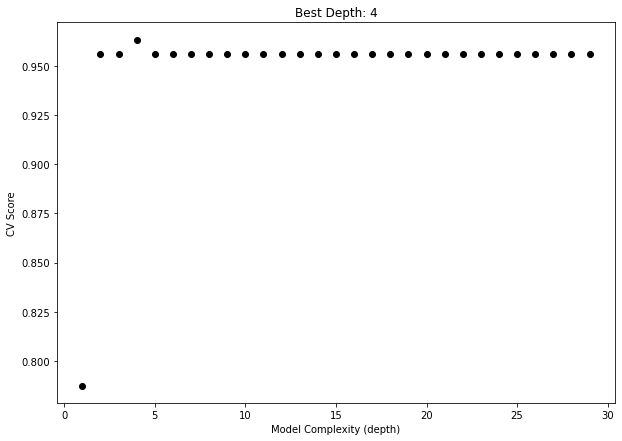

In [16]:
# create a figure with 1 axis
fig, ax = plt.subplots(1, figsize = (10, 7))

# set labels for x and y axes
ax.set(xlabel = "Model Complexity (depth)", ylabel = "CV Score")

# initialize a best score of 0 to compare to
best_score = 0

# identifying the best complexity/depth
for d in range(1, 30): # testing values 1-29 
    T = tree.DecisionTreeClassifier(max_depth = d) # create the model with the specified depth
    cv_score = cross_val_score(T, X_train, y_train, cv = 5).mean() # calculate the cross validation score for that depth
    ax.scatter(d, cv_score, color = "black") # plot the depth and its corresponding cross validation score
    
    # update best_score if the current depth gives a better cross validation score
    if cv_score > best_score:
        best_depth = d # save the depth that gives this improved cross validation score
        best_score = cv_score
        
# set the title to tell us what the best depth was
ax.set(title = "Best Depth: " + str(best_depth))

In [22]:
# create the model using the best depth from above
T = tree.DecisionTreeClassifier(max_depth = best_depth)
# fit the model to the training data
model = T.fit(X_train, y_train)
# score the model's performance on the unseen test data
model.score(X_test, y_test)

0.9846153846153847

Yay! On our test data, our model was accurate approximately 98% of the time. In other words, our model accurately predicted the species of a penguin in the test dataset 98% of the time. Well, what about the other 2% of the time?

It is as important, if not more so, to understand where our model went wrong in addition to where it performed well. To do this, let's try to visualize the overall behavior of our model. More specifically, how does our model make the decisions that it does of assigning a penguin to a particular species label? We can achieve this simply by plotting decision regions, or the parts of the data space that the model attributes to each specific label. In other words, decision regions help us visualize the boundaries of classification that our model creates, essentially allowing us a way to 'see' the algorithm our classifier has developed and is utilizing in its decision making process. For instance, a plot of the decision regions for our model of the penguins data can help us see the specific culmen lengths and islands where our model stops identifying the penguin as Adelie and begins classifying it as Chinstrap, or where it stops identifying the penguin as Chinstrap and starts labeling it as Gentoo, etc. Decision regions are consequently a powerful tool assessing both the overall performance of our model as well as the individual faults our model makes. 

To perform this plotting behavior, we define and deploy a function 'plot_regions' that trains a classifier on the training data and proceeds to visualize the decision regions for the test data. 

In [23]:
def plot_regions(c, X, y, X_columns):
    """
    Parameters
    -----------
    c: a model that has been trained on training data
    X: a dataframe with predictor variables
    y: a data series with the target variable (must be a quantitative variable)
    X_columns : a list with the names of the predictor variables
    
    Returns
    -----------
    plots the decision regions from a classifier (modeled on training data) underneath the test data, X and Y
    
    allows for the visualization of modeling errors
    
    """

    # giving shorter names to the x and y variables for convenience
    x0 = X[X_columns[0]] # x axis variable
    x1 = X[X_columns[1]] # y axis variable
    
    # create a grid
    grid_x = np.linspace(x0.min() - 1, x0.max() + 1, 501)
    grid_y = np.linspace(x1.min() - 1, x1.max() + 1, 501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    # make predictions and reshape the grid
    p = c.predict(np.c_[xx.ravel(), yy.ravel()])
    p = p.reshape(xx.shape)
    
    # create the plot
    fig, ax = plt.subplots(1)
    
    # plot the data
    from matplotlib.colors import ListedColormap
    classes = ['Adelie', 'Chinstrap', 'Gentoo']
    colors = ListedColormap(['b', 'g', 'r'])
    
    # show how the model makes predictions, with each color representing a different prediction
    ax.contourf(xx, yy, p, cmap = colors, alpha = 0.2)
    
    # plot the predictor variables and label the correct classification by color
    scatter = plt.scatter(x0, x1, c = y, cmap = colors)
    
    # formatting specifications if Island is the variable on the x axis
    if X_columns[0] == "Island":
        plt.xticks(np.arange(min(x0), max(x0) + 1, 1.0)) # set the tickmarks along the x axis
        x = ['Biscoe', 'Dream', 'Torgersen'] # list of tick labels
        ax.set_xticklabels(x) # label the ticks using the list
    
    # set x and y axis labels
    ax.set(xlabel = X_columns[0],
           ylabel = X_columns[1])
    
    # display a legend
    plt.legend(handles = scatter.legend_elements()[0], labels = classes)

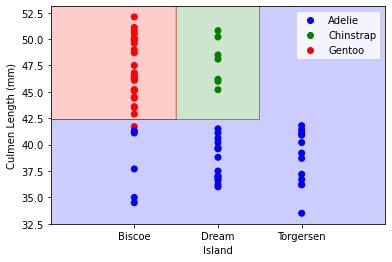

In [24]:
plot_regions(model, X_test, y_test, ['Island', 'Culmen Length (mm)'])

In this decision regions plot, the background colors represent the model's predictions, while the color of the points represents the correct label for that penguin. This allows us to understand where and why the model makes mistakes.

If we look at Torgersen island, every point is blue, and every point is on a blue background. This means that the prediction and actual label match. The model did not make any mistakes here because there is only one species present on Torgersen.

On Dream island, we see again that the color of every point matches the background color it appears on. It's easy to see that there is a clear gap between the culmen lengths of Chinstrap and Adelie penguins, so the model was able to make accurate predictions.

On the other hand, we see a point in the Biscoe island category that is red, but falls on a blue background. This means that the model incorrectly predicted it as an Adelie penguin, even though it was actually a Gentoo. However, we can understand why this happened by looking at the other points on Biscoe--the culmen length of that mistakenly labeled penguin falls closer to the Biscoe island Adelies than it does to the other Biscoe island Gentoos. 

## Model #2: Logistic Regression

The next model we look at is Logistic Regression - a machine learning algorithm that deals with regression and classification tasks, though primarily the latter. In particular, Logistic Regression uses predictor/independent variables to predict probabilities associated with a (categorical) target/dependent variable. A fundamental example of logistic regression is checking whether or not it will rain.

**Fun fact**: The most rudimentary version of Logistic Regression was actually developed in the early 19th century to evaluate demographics and for chemical analysis.

Logistic Regression uses the logistic or sigmoid function, which, in turn, maps a set of real numbers into a range of (0, 1). The following is the (generalized) logistic function:

$$f(x) = \frac{A}{1 + e^{rx_{o}-rx}}$$

, where $A$ is the maximum value of the curve, $r$ is the logistic growth rate, $x \in R$, and $x_{o}$ is the sigmoid midpoint.

The function used by Python, however, is simplified to:

$$f(x) = \frac{1}{1 + e^{-x}}$$

The graph of the function forms the shape of an S and processes an essentially binary result. That is, if the function's output is less than 0.5, it is rounded down to 0, whereas if the function's output is more than 0.5, it is rounded up to 1. If the output is $p$, then there is a $p$ probability of something occurring.  

Now, consider our case study; suppose that *Culmen Length (mm)* and *Body Mass (g)* are our predictor variables. When implemented, Python's Logistic Regression implements this function and performs predictive analysis on these two columns. Then, the probability or weight associated with each output is computed accordingly, which determines whether or not the input provided (i.e. the aforementioned columns) corresponds to an Adelie, Chinstrap or Gentoo penguin.

In essence, implementing Logistic Regression in Python goes as follows:
a. Choose appropriate predictor and a target set of variables.
b. Split the data into training and testing data.
c. Create an instance of Logistic Regression to evaluate the data.
d. Fit and score the data.
e. Plot the data for a satisfying visualization (assuming overfitting has been taken care of).

Notice that the Logistic Regression uses a complexity parameter to wit, *max_iter*, which as the name suggests, is simple the maximum number of iterations. The *max_iter* parameter uses a default number of iterations of 100 however, this number can be increased (or decreased) based on the size of the training data. As with Decision Trees, Logistic Regression is well-suited for categorical data, unlike linear regression, which predicts continuous dependent variables.

Now onto the fun part: Coding. Ordinarily, we would proceed by first importing the necessary libraries, but this has already been done. Instead, as the summary above suggests, we begin by excluding any unecessary columns so as to only work with predictor and target variables. In this case, the target variable is *Species* while the predictor variables are *Culmen Length (mm)* and *Culmen Depth (mm)*.

In [3]:
# assign the appropriate penguins subframe to penguins2
penguins2 = penguins[['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)']]
# drop any NaN values
penguins2 = penguins2.dropna()

Notice how we got rid of the *nan* values too using *.dropna()*. Obviously, *nan* values are irrelevent to a machine learning model and were therefore removed from the data.
We then proceed to the training and testing data portion. To overcome potential overfitting, we split the *penguins2* dataframe into training and testing data. The test size of 0.2 was chosen arbitrarily but carefully.

In [4]:
# split the data into training and test sets
train, test = train_test_split(penguins2, test_size = 0.2)

In [7]:
# call 'prep_penguins_data' to clean and prepare the data
X_train, y_train = prep_penguins_data(train)
X_test, y_test = prep_penguins_data(test)

In [8]:
# create a logistic regression model 'LR'; set max_iter to 250 to ensure convergence
LR = LogisticRegression(max_iter = 250)
# fit the model to the training data
model = LR.fit(X_train, y_train)
# score our model on the test data
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9597069597069597, 0.9855072463768116)

Notice that after fitting and scoring our Logistic Regression model, we ended up with a score of 0.986 (to 3.d.p.). Unfortunately, all Logistic Regression Models are prone to some overfitting if not correctly implemented, and thus, there may have been some slight overfitting taking place above. Although cross-validation could have been implemented to Logistic Regression to identify the optimal value of the complexity/regularization parameter, there were complications with running the code in this Python document. In particular, if cross validation was implemented, it would take multiple hours to see output and eventually plot it, which consequently impacts the performance of the Jupyter Notebook as a whole. However, after running it in a separate notebook, we noticed that the score that minimized overfitting tends to range around 250.

We apologize for this inconvience however, below is the code necessary to identify the optimal complexity:

for C in np.linspace(0.005, 0.05, 10):

  print(str(np.round(C, 4)), end = ": 
 
  LR = LogisticRegression(C = C)
 
  cv_score = cross_val_score(LR, X_train, y_train, cv = 5).mean()
 
  print(np.round(cv_score, 3))
  
The code above generates different values of complexity parameter *C*, along with corresponding cv_scores. The higher the cv_score the better the choice of *C*.

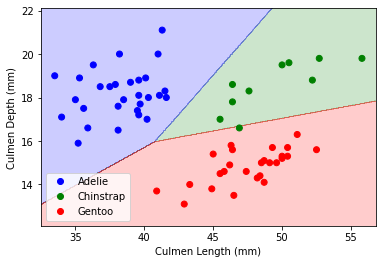

In [40]:
# plot the decision regions of our model
plot_regions(model, X_test, y_test, ['Culmen Length (mm)', 'Culmen Depth (mm)'])

The diagram above is a color-coded graph of different data points (individual penguins). Evident by the key, the blue penguins are Adelie, those colored green are Chinstrap, whereas the remainder in red are Gentoo. The model is quite impressive in that it almost explicitly split each penguin into a colored region based on these two features alone.

Having seen the illustration, researchers can characterize penguins into their respective groups based on the predictor variables. For instance, one may claim that Adelie penguins have a shorter culmen length and 'higher' culmen depth than the Gentoo penguins. Conversely, the Gentoo penguins have a higher culmen depth than Adelie penguins. On the other hand, the Chinstraps have a relatively high culmen depth and culmen length. So what does this tell you? If you ever go to Antartica, or a zoo for that matter, you can identify the type of penguins they have and impress your friends.

Observe that the model only incorrectly considered a Chinstrap penguin as a Gentoo, though this was minor as the green data point (Chinstrap) was extremely close to its respective border. The most plausible reason for this error would be that some features of a Chinstrap penguin happened to be similar to the Gentoo species. Taking a closer look at the data, this was likely a consequence of the Culmen Length predictor variable.

Still, having meticulously analyzed Logistic Regression, a prominent question remains: What the the limitations to Logistic Regression? One barrier to an effective Logistic model are data outliers; this may intrinsically be an issue with data collection, but must nonetheless be mentioned. A more noteworthy issue involves the assumptions made by the model. For example, the model assumes linearity between the predictor and target variables when in reality, the relationship may be more complicated.
As such, this model is certainly not perfect but is still easy to implement, understand and ultimately efficient (at training data). Other benefits of using this model include a faster classification rate, decent accuracy and it can be used with multiple classes.

## Model #3: Support Vector Classifier

The third model in this project is the Support Vector Classifier (SVC)

In [41]:
# selecting the columns from our feature selection working with and assigning this subframe to penguins3
penguins3 = penguins[['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)']]
# dropping any NaN values
penguins3 = penguins3.dropna()

In [42]:
# splitting our data into training and test sets
train, test = train_test_split(penguins3, test_size = 0.2)

In [43]:
# calling 'prep_penguins_data' to clean and prepare our data
X_train, y_train = prep_penguins_data(train)
X_test, y_test = prep_penguins_data(test)

[Text(0.5, 1.0, 'Best Gamma: 0.01')]

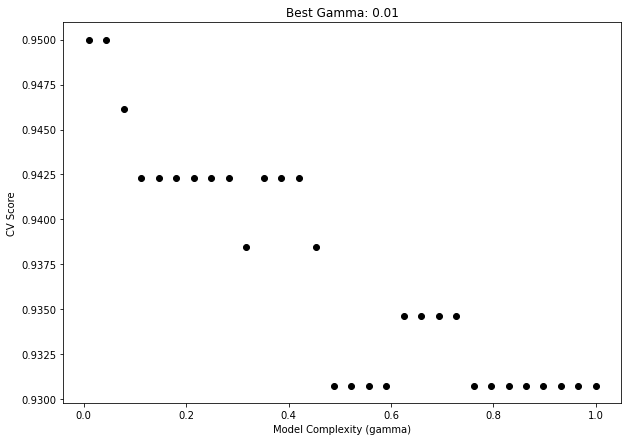

In [44]:
# produces a figure that will later display cross-validation scores across varying model complexities
fig, ax = plt.subplots(1, figsize = (10, 7))
# setting the axis labels: x-axis = Model Complexity; y-axis = CV Score
ax.set(xlabel = "Model Complexity (gamma)", ylabel = "CV Score")
# initializing a variable 'best_score' that will keep track of the best cross validation score
best_score = 0

# utilized a for-loop to iterate over a range of possible model complexities, or gamma values
for g in np.linspace(0.01, 1, 30):
    
    # generated a support vector classifier, SVC, with a gamma value set equal to the current
    # iteration value (g)
    SVC = svm.SVC(gamma = g)
    # computed cross-validation scores by deploying the 'cross_val_score' method of sklearn on
    # the training data with a k-fold value of 5
    # took the mean of the numpy array generated by 'cross_val_score' to acquire an average CV score
    cv_score = cross_val_score(SVC, X_train, y_train, cv = 5).mean()
    
    # on the previously defined figure, constructed a scatterplot with gamma values on the
    # x-axis and CV scores on the y-axis
    ax.scatter(g, cv_score, color = "black")
    
    # if the current cross validation score is higher (i.e. better) than the best_score,
    # we assign the current model complexity (g) to a variable 'best_gamma' in order to keep
    # track of the model complexity that reaps the highest score and we update the 'best_score'
    # to be the corresponding 'cv_score'
    if cv_score > best_score:
        best_gamma = g
        best_score = cv_score

# we set the title to display the model complexity or gamma value that produced the highest 
# cross-validation score
ax.set(title = "Best Gamma: " + str(best_gamma))

In [45]:
# generated a support vector classifier model with the model complexity argument set
# to the best gamma value found in the previous for-loop
SVM = svm.SVC(gamma = best_gamma)
# we fit the training data to the model
model = SVM.fit(X_train, y_train)
# we score our model on the test data
model.score(X_test, y_test)

0.9692307692307692

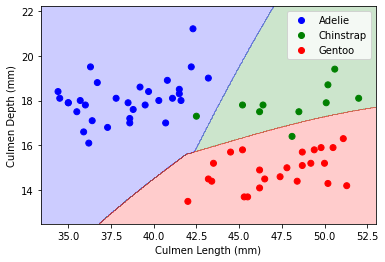

In [46]:
# plot the decision regions for our model
plot_regions(model, X_test, y_test, ['Culmen Length (mm)', 'Culmen Depth (mm)'])

From the visualization above, we can see that our model made two mistakes on the test data. 

These erroneous classifications are depicted in the plot where a single green data point is seen in the blue background and another green data point is seen in the red background. More specifically, two Chinstrap penguins (the green points) were wrongly determined to be Adelie (green point in the blue background) and Gentoo (green point in the red background) penguins. 

The first mistake was likely the result of this Chinstrap penguin having a culmen length considerably shorter than the average Chinstrap penguin and closer to the mean culmen length of Adelie penguins. 

As for the second error, our model most probably mistook this Chinstrap penguin for a Gentoo penguin because it has a culmen depth smaller than the average Chinstrap penguin, more closely resembling the size of an average Gentoo penguin.

## Critical Discussion